In [4]:
############# linear regression:- mini batch gradient descent ###########

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

In [6]:
from google.colab import files
uploaded = files.upload()

Saving test_feature_matrix.xlsx to test_feature_matrix.xlsx
Saving test_output.xlsx to test_output.xlsx
Saving training_feature_matrix.xlsx to training_feature_matrix.xlsx
Saving training_output.xlsx to training_output.xlsx


In [7]:
X_train = pd.read_excel('training_feature_matrix.xlsx', header = None)
Y_train = pd.read_excel('training_output.xlsx', header = None)
X_test = pd.read_excel('test_feature_matrix.xlsx', header = None)
Y_test = pd.read_excel('test_output.xlsx', header = None)

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(245, 2)
(245, 1)
(104, 2)
(104, 1)


In [9]:
def normalize(X):
  res = (X - X.min())/(X.max() - X.min())  #this applies to every column
  return res

In [10]:
#function to compute cost
def compute_cost(Y_pred, Y):
  cost_val = 0
  m = Y.shape[0]
  for i in range(len(Y)):
    cost_val = cost_val + (Y_pred[i] - Y.iloc[i,0])**2
  return (0.5*cost_val)/m

In [11]:
def update_param(X, Y, w1, w2, b, learning_rate = 0.01):
  Y_pred = [0 for i in range(len(X))]
  dw1 = 0
  dw2 = 0
  db = 0
  m = X.shape[0]

  for i in range(len(X)):
    Y_pred[i] = X.iloc[i,0]*w1 + X.iloc[i,1]*w2 + b
    db = db + (Y_pred[i] - Y.iloc[i,0])
    dw1 = dw1 + (Y_pred[i] - Y.iloc[i,0])* X.iloc[i,0]
    dw2 = dw2 + (Y_pred[i] - Y.iloc[i,0])* X.iloc[i,1]
  
  w1 = w1 - learning_rate * (dw1/m)
  w2 = w2 - learning_rate * (dw2/m)
  b = b - learning_rate * (db/m)

  cost = compute_cost(Y_pred, Y)
  return w1, w2, b, cost

In [12]:
def create_mini_batches(X, Y, rand_state, batch_size = 64):
    mini_batches = []
    m = X.shape[0]
    X_shuffled = X.sample(frac = 1, random_state = rand_state).reset_index(drop = True)
    Y_shuffled = Y.sample(frac = 1, random_state = rand_state).reset_index(drop = True)
    num_mini_batch = m // batch_size
    
    for i in range (num_mini_batch):
        mini_X = X_shuffled[i*batch_size:(i+1)*batch_size]
        mini_Y = Y_shuffled[i*batch_size:(i+1)*batch_size]
        mini_batches.append((mini_X, mini_Y))
    
    if(m % batch_size != 0):
        i = i+1
        mini_X = X_shuffled[i*batch_size:]
        mini_Y = Y_shuffled[i*batch_size:]
        mini_batches.append((mini_X, mini_Y))
        
    return mini_batches

In [13]:
def lin_reg_mini_batch(X, Y, batch_size = 64, learning_rate = 0.01, epochs = 100):
  cost_list = [0 for i in range(epochs)]
  w1_list = [0 for i in range(epochs)]
  w2_list = [0 for i in range(epochs)]
  
  w1 = 0.5
  w2 = -0.5
  b = 0.0

  X_norm = normalize(X)
  Y_norm = normalize(Y)

  m = X_norm.shape[0]
  num_mini_batches = math.ceil(m/batch_size)

  for i in range(epochs):
    mini_batch = create_mini_batches(X_norm, Y_norm, i, batch_size)
    cost_val = 0

    for j in range(num_mini_batches):
      X_mini_batch = mini_batch[j][0]
      Y_mini_batch = mini_batch[j][1]

      w1,w2,b,cost = update_param(X_mini_batch, Y_mini_batch, w1, w2, b, learning_rate)
      cost_val = cost_val + cost

    cost_list[i] = cost_val
    w1_list[i] = w1
    w2_list[i] = w2

  return w1, w2, b, cost_list, w1_list, w2_list 

In [ ]:
epochs = 2000
w1_f, w2_f, b_f, costl, w1l, w2l = lin_reg_mini_batch(X_train, Y_train, batch_size = 16, learning_rate = 0.01, epochs = epochs)

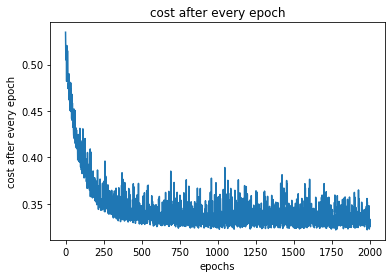

In [ ]:
epoch_list = list(range(epochs))
plt.plot(epoch_list, costl)
plt.title('cost after every epoch')
plt.xlabel('epochs')
plt.ylabel('cost after every epoch')
plt.show()

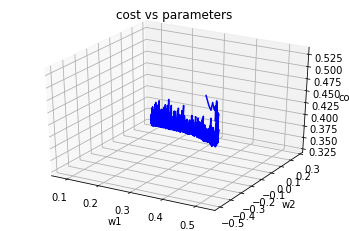

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(w1l,w2l,costl,'blue')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('cost')
ax.set_title('cost vs parameters')
#fig.show()
plt.show()

In [ ]:
print("w1 is: ", w1_f)
print("w2 is: ", w2_f)
print("b is: ", b_f)

w1 is:  0.08319625261051168
w2 is:  0.27092861477408925
b is:  0.15887635792934351


In [14]:
# predict output values
def predict(test_data, w1_final, w2_final, b_final):
    Y_pred = [0 for i in range(len(test_data))]
    for i in range(len(test_data)):
      Y_pred[i] = test_data.iloc[i,0]*w1_final + test_data.iloc[i,1]*w2_final + b_final
    return Y_pred

In [15]:
min_Y = Y_test.min()
max_Y = Y_test.max()
def denormalize(Y_predict, min_val, max_val):
  for i in range(len(Y_predict)):
    Y_out = Y_predict*(max_val-min_val) + min_val
  return Y_out

In [16]:
# mean square error
def mean_sqr_error(Y_pred, Y_test):
  error = (Y_test-Y_pred)**2
  mean_error = float(np.mean(error))
  return mean_error

In [ ]:
X_test_norm = normalize(X_test)
Y_predicted = pd.DataFrame(predict(X_test_norm, w1_f, w2_f, b_f))
Y_output = denormalize(Y_predicted, min_Y, max_Y)

In [ ]:
mean_sq_error = mean_sqr_error(Y_output,Y_test)
print("mean square error is: ", mean_sq_error)

mean square error is:  6.3910405498004


In [17]:
############# linear regression:- stochastic gradient descent ############
############# here mini batch size = number of training samples in training data ###########
epochs1 = 2000
w1_f1, w2_f1, b_f1, costl1, w1l1, w2l1 = lin_reg_mini_batch(X_train, Y_train, batch_size = 1, learning_rate = 0.001, epochs = epochs1)

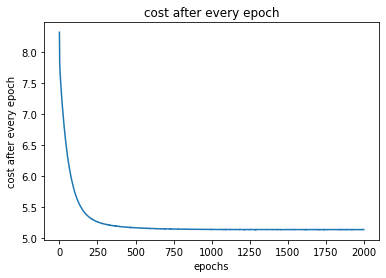

In [18]:
epoch_list1 = list(range(epochs1))
plt.plot(epoch_list1, costl1)
plt.title('cost after every epoch')
plt.xlabel('epochs')
plt.ylabel('cost after every epoch')
plt.show()

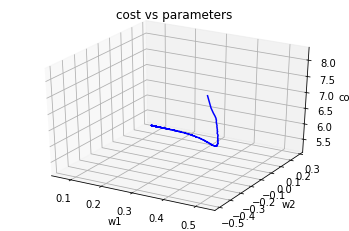

In [19]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(w1l1,w2l1,costl1,'blue')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('cost')
ax.set_title('cost vs parameters')
#fig.show()
plt.show()

In [20]:
print("w1 is: ", w1_f1)
print("w2 is: ", w2_f1)
print("b is: ", b_f1)

w1 is:  0.06983217871405756
w2 is:  0.27264794906563483
b is:  0.17241386561904526


In [21]:
X_test_norm = normalize(X_test)
Y_predicted = pd.DataFrame(predict(X_test_norm, w1_f1, w2_f1, b_f1))
Y_output = denormalize(Y_predicted, min_Y, max_Y)

In [22]:
mean_sq_error = mean_sqr_error(Y_output,Y_test)
print("mean square error is: ", mean_sq_error)

mean square error is:  6.318621244320009
